In [13]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import cv2
import imageio
import pandas as pd

In [20]:
temperature = pd.read_csv('data/temperature.txt', names=['time', 'temperature'])

In [2]:
data_path = Path('data') / "depth"
results_path = Path('results')
results_path.mkdir(exist_ok=True)

frames = []
times = []
# Load the data
for frame_path in sorted(data_path.glob('*.npy')):
	times.append(float(frame_path.stem[6:]))
	frame = np.load(frame_path)
	frames.append(frame)

In [10]:
depths = []
with imageio.get_writer(results_path / 'movie.gif', mode='I') as writer:
	for frame in frames:
		depth_crop = frame[100:300, 250:450]
		depth_mean = np.mean(depth_crop)
		depths.append(depth_mean)
		depth_vis = (frame.copy().astype(np.float64) / 1000 * 256)
		depth_vis = np.clip(depth_vis, 0, 255).astype(np.uint8)
		depth_vis = cv2.applyColorMap(depth_vis.astype(np.uint8), cv2.COLORMAP_INFERNO)

		writer.append_data(depth_vis)

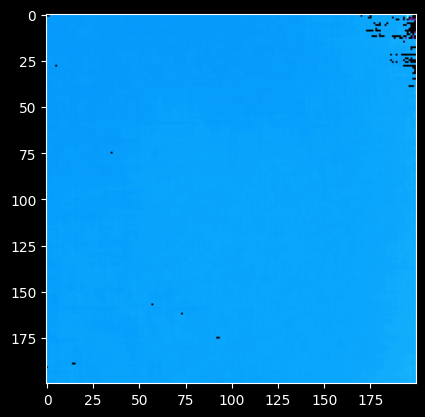

In [9]:
depth_vis = (frame.copy().astype(np.float64) / 1000 * 256)
depth_vis = np.clip(depth_vis, 0, 255).astype(np.uint8)
depth_vis = cv2.applyColorMap(depth_vis.astype(np.uint8), cv2.COLORMAP_INFERNO)

plt.imshow(depth_vis[100:300, 250:450])

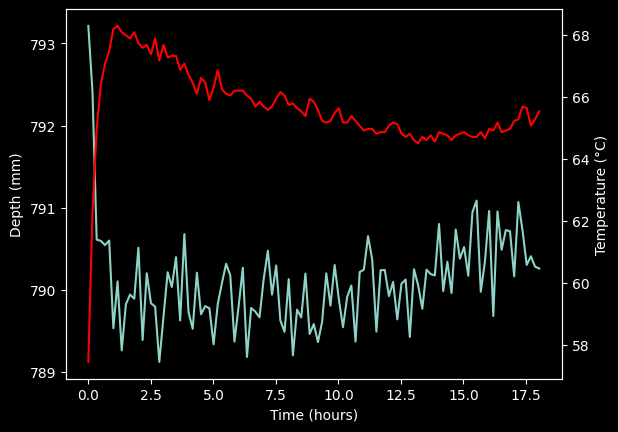

In [29]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Depth (mm)')
ax1.plot((np.array(times) - times[0])/60/60, depths)
ax2.set_ylabel('Temperature (°C)')
ax2.plot((np.array(times) - times[0])/60/60, temperature['temperature'], color='red')

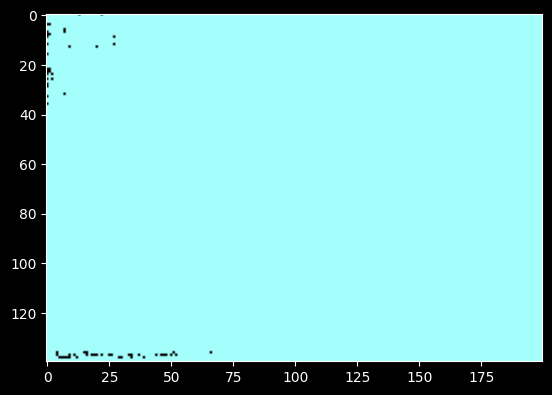

In [6]:
depth_vis = (frames[0].copy().astype(np.float64) / 1000 * 255)
depth_vis = np.clip(depth_vis, 0, 255).astype(np.uint8)
depth_vis = cv2.applyColorMap(depth_vis.astype(np.uint8), cv2.COLORMAP_INFERNO)
plt.imshow(depth_vis[160:300, 220:420])

In [36]:
import pandas as pd
time_h = (np.array(times) - times[0])/60/60
df = pd.DataFrame({'time': time_h, 'depth': depths, 'temperature': temperature['temperature']})
df.to_excel('results/depths.xlsx', index=False)